In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline  
plt.style.use('ggplot')

In [94]:
def dataPreProcessTime(column, df):
    df[column] = pd.to_datetime(df[column]).dt.date
    df[column] = df[column].apply(lambda x: x.strftime('%Y%m%d')).astype(int)
    return df

In [92]:
train_sample = dataPreProcessTime("click_time", train_sample)

In [101]:
train_sample = pd.read_csv('train_sample.csv')
train_sample["click_time"] = pd.to_datetime(train_sample.click_time)
train_sample["date"] = pd.to_datetime(train_sample['click_time']).dt.date
train_sample["month"] = pd.to_datetime(train_sample['date']).dt.month
train_sample["day"] = pd.to_datetime(train_sample['date']).dt.day
train_sample["year"] = pd.to_datetime(train_sample['date']).dt.year

train_sample["time"] = pd.to_datetime(train_sample['click_time']).dt.time
train_sample[['hour','minute','second']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in train_sample['time']])

In [102]:
train_sample.attributed_time = pd.to_datetime(train_sample.attributed_time)

In [ ]:
train_sample['']

In [103]:
train_sample.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,date,month,day,year,time,hour,minute,second
0,87540,12,1,13,497,2017-11-07 09:30:38,NaT,0,2017-11-07,11,7,2017,09:30:38,9,30,38
1,105560,25,1,17,259,2017-11-07 13:40:27,NaT,0,2017-11-07,11,7,2017,13:40:27,13,40,27
2,101424,12,1,19,212,2017-11-07 18:05:24,NaT,0,2017-11-07,11,7,2017,18:05:24,18,5,24
3,94584,13,1,13,477,2017-11-07 04:58:08,NaT,0,2017-11-07,11,7,2017,04:58:08,4,58,8
4,68413,12,1,1,178,2017-11-09 09:00:09,NaT,0,2017-11-09,11,9,2017,09:00:09,9,0,9


(array([  8.,   0.,   0.,  77.,   0.,   0.,  83.,   0.,   0.,  59.]),
 array([ 6. ,  6.3,  6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ]),
 <a list of 10 Patch objects>)

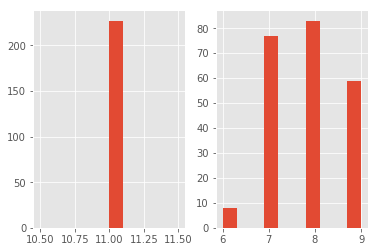

In [62]:
plt.subplot(121)
plt.hist(train_sample[train_sample.is_attributed == 1].month)
plt.subplot(122)
plt.hist(train_sample[train_sample.is_attributed == 1].day)
#plt.subplot(133)
#plt.plot()

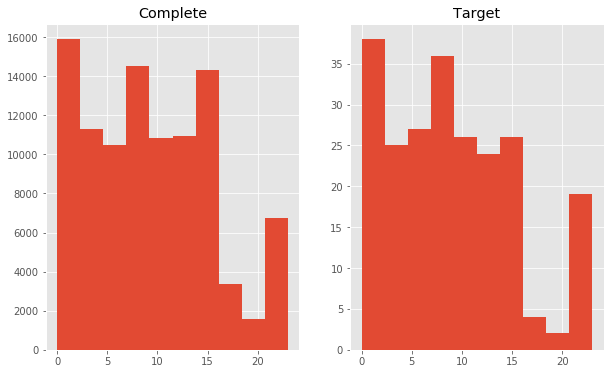

In [74]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.hist(train_sample.hour)
plt.title("Complete")
plt.subplot(1, 2, 2)
plt.hist(train_sample[train_sample.is_attributed == 1].hour)
plt.title("Target")

In [75]:
train_sample.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,date,month,day,year,time,hour,minute,second
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,2017-11-07,11,7,2017,09:30:38,9,30,38
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,2017-11-07,11,7,2017,13:40:27,13,40,27
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,2017-11-07,11,7,2017,18:05:24,18,5,24
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,2017-11-07,11,7,2017,04:58:08,4,58,8
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,2017-11-09,11,9,2017,09:00:09,9,0,9


In [80]:
for i in ["app","device","os","channel"]:
    
    print("Number of unique {}: {}".format(i, len(train_sample[i].unique())))

Number of unique app: 161
Number of unique device: 100
Number of unique os: 130
Number of unique channel: 161


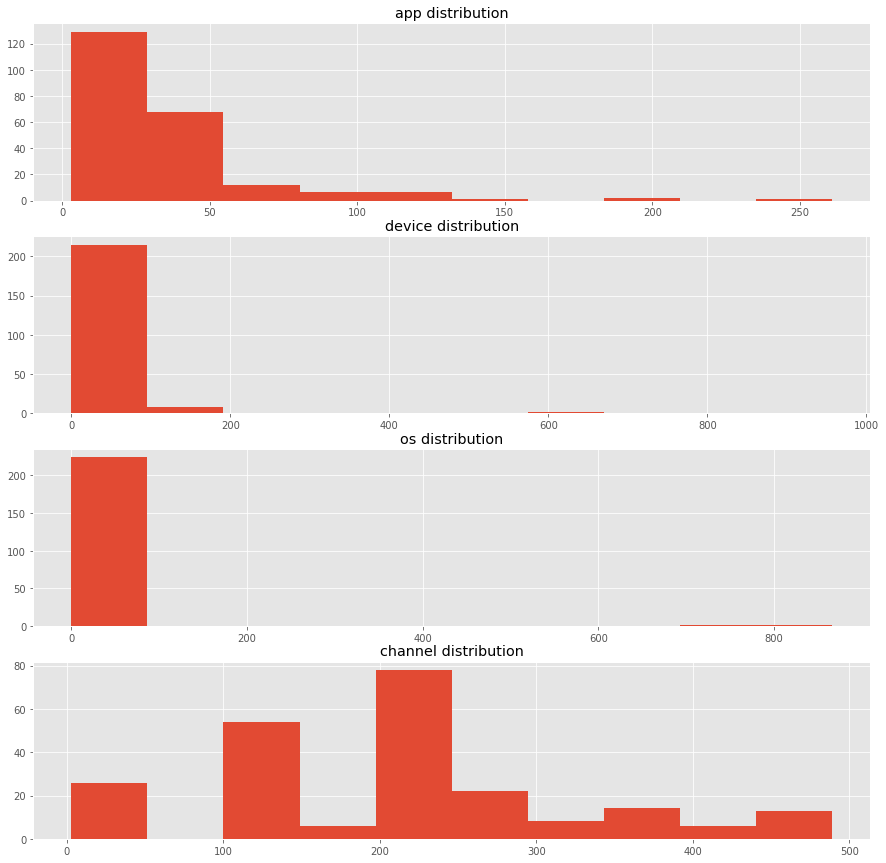

In [113]:
n = 4
plt.figure(figsize=(10,10))
a = plt.subplots(4, 1,figsize=(15,15))[1].ravel()


for ix, i in enumerate(["app","device","os","channel"]):

    a[ix].hist(train_sample[train_sample.is_attributed == 1][i])
    a[ix].set_title("{} distribution".format(i))
    
    
plt.show()

In [109]:
train_sample_target = train_sample[train_sample.is_attributed == 1]
train_sample_target["time_diff"] = (train_sample_target.attributed_time - train_sample_target.click_time).dt.total_seconds()

C:\Users\mt16558\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
train_sample_target.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,date,month,day,year,time,hour,minute,second,time_diff
284,224120,19,0,29,213,2017-11-08 02:22:13,2017-11-08 02:22:38,1,2017-11-08,11,8,2017,02:22:13,2,22,13,25.0
481,272894,10,1,7,113,2017-11-08 06:10:05,2017-11-08 06:10:37,1,2017-11-08,11,8,2017,06:10:05,6,10,5,32.0
1208,79001,19,0,0,213,2017-11-07 09:54:22,2017-11-07 11:59:05,1,2017-11-07,11,7,2017,09:54:22,9,54,22,7483.0
1341,131029,19,0,0,343,2017-11-09 10:58:46,2017-11-09 11:52:01,1,2017-11-09,11,9,2017,10:58:46,10,58,46,3195.0
1412,40352,19,0,0,213,2017-11-07 22:19:03,2017-11-08 01:55:02,1,2017-11-07,11,7,2017,22:19:03,22,19,3,12959.0


(array([ 170.,   19.,   10.,   11.,    1.,    6.,    5.,    3.,    1.,    1.]),
 array([  2.00000000e+00,   4.63590000e+03,   9.26980000e+03,
          1.39037000e+04,   1.85376000e+04,   2.31715000e+04,
          2.78054000e+04,   3.24393000e+04,   3.70732000e+04,
          4.17071000e+04,   4.63410000e+04]),
 <a list of 10 Patch objects>)

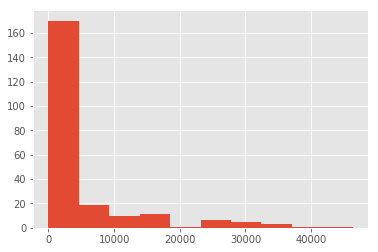

In [112]:
plt.hist(train_sample_target.time_diff)

In [147]:
for i in ["app","device","os","channel"]:
    display(train_sample_target.groupby(i).count()["time_diff"].sort_values(ascending = False)[:10])


app
19    70
35    27
29    22
10    18
5     14
45    11
9      8
72     6
18     5
3      4
Name: time_diff, dtype: int64

device
1     146
0      52
16      3
97      3
2       2
21      2
50      1
4       1
6       1
30      1
Name: time_diff, dtype: int64

os
19    41
0     26
24    26
13    25
29    11
21     8
17     6
27     6
22     6
7      5
Name: time_diff, dtype: int64

channel
213    72
113    31
21     19
101    13
274    12
347    11
5       5
171     5
282     5
243     5
Name: time_diff, dtype: int64

In [143]:
top_timediff_device = train_sample_target.groupby("device").mean()["time_diff"].sort_values(ascending = False)[:10]